# Student Dropout Risk Analysis

This notebook presents an exploratory data analysis (EDA) of a synthetic student performance dataset to understand factors contributing to student dropout risk. We visualize distributions and categorical associations with dropout risk to extract actionable insights that can help educators and policymakers intervene effectively.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#load dataset
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/enhanced_student_habits_performance_dataset.csv")
df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [3]:
#data cleaning
df.replace('',pd.NA,inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()
#data have no missing values, also it is a synthetic data make specially for analysis so no further cleaning required
df.drop(columns=['student_id'],inplace=True)

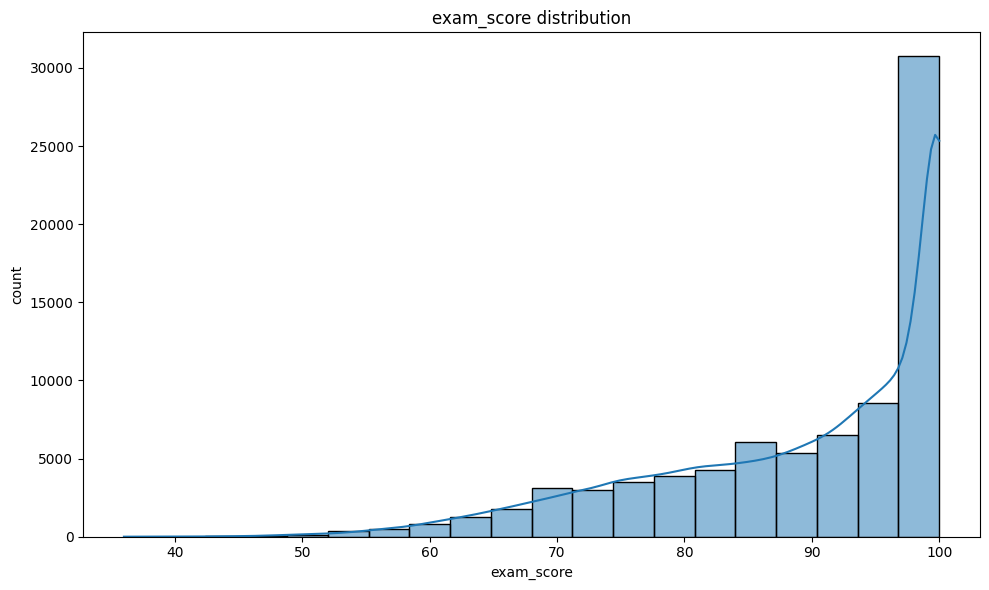

/tmp/ipython-input-4-2168140180.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dropout_risk', data=df, palette='Set2')


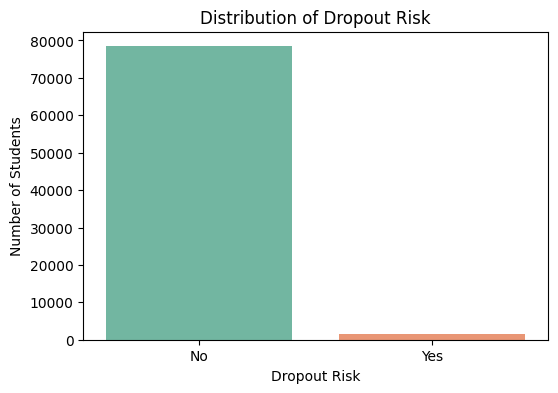

In [4]:
#EDA
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['exam_score'],kde=True,bins=20,stat="count",)
plt.title('exam_score distribution')
plt.xlabel('exam_score')
plt.ylabel('count')
plt.tight_layout()
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='dropout_risk', data=df, palette='Set2')
plt.title("Distribution of Dropout Risk")
plt.ylabel("Number of Students")
plt.xlabel("Dropout Risk")
plt.show()


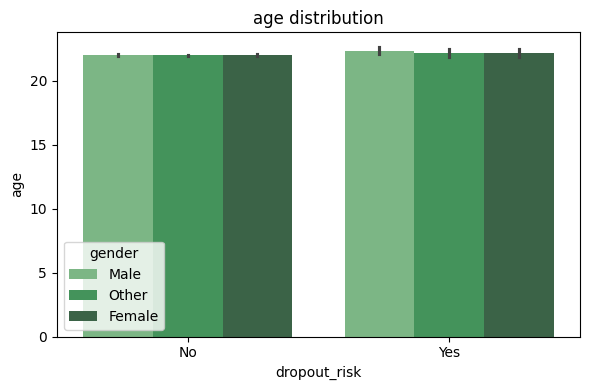

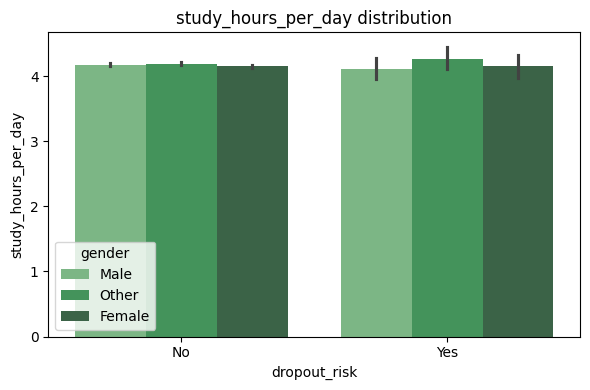

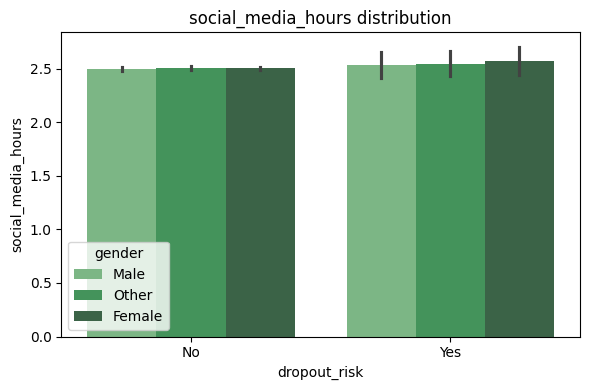

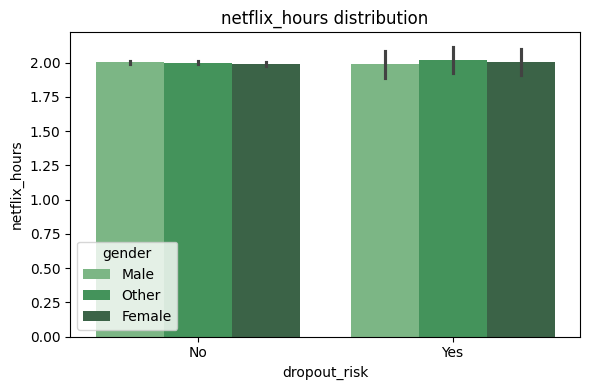

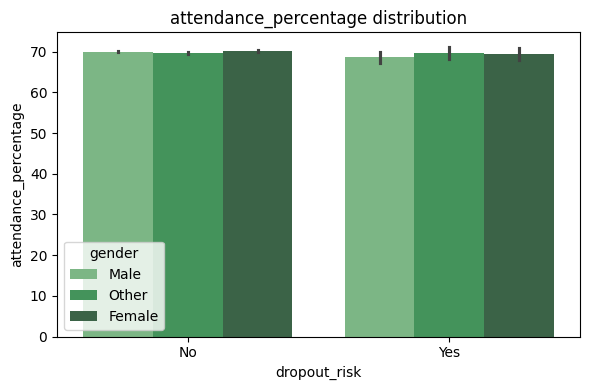

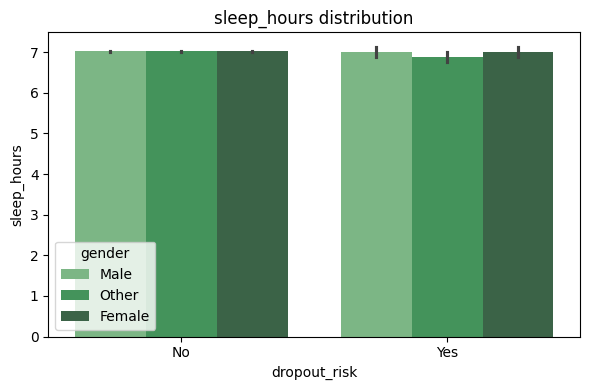

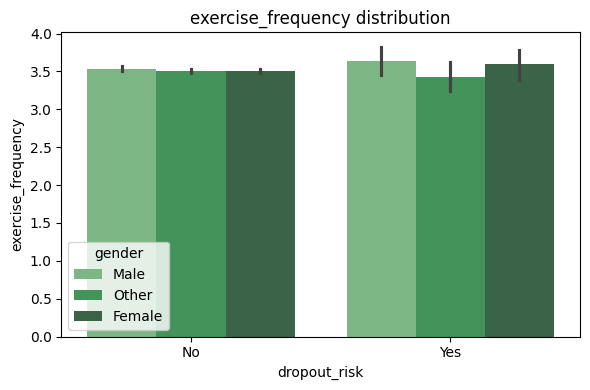

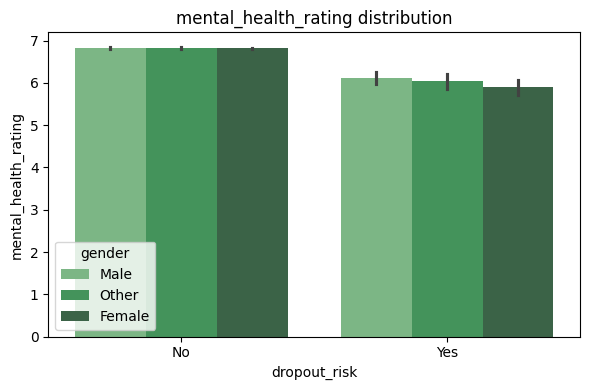

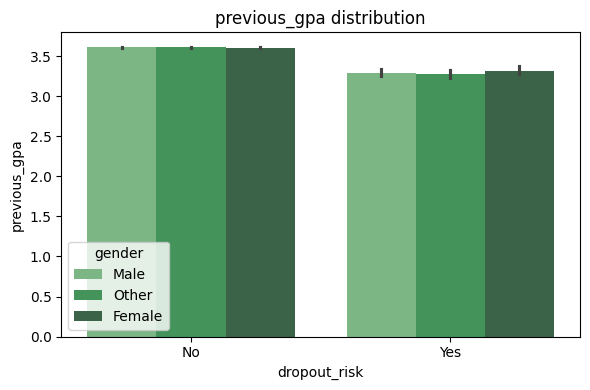

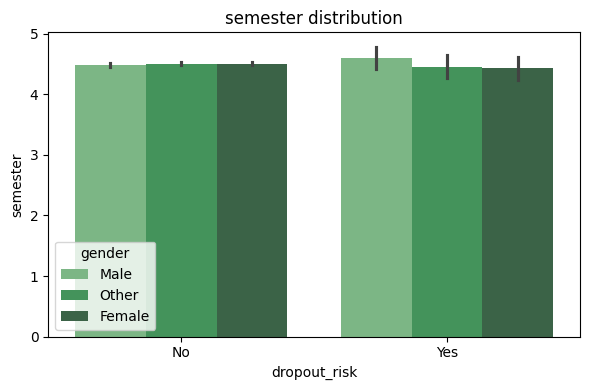

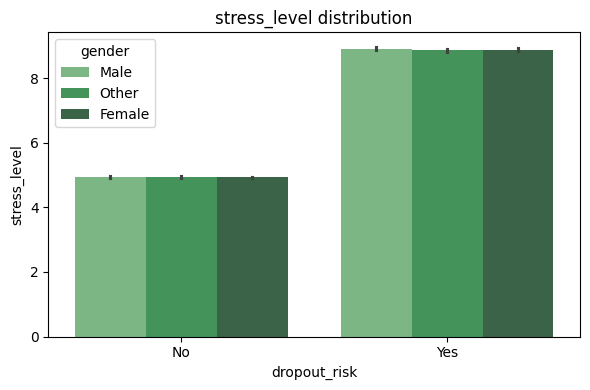

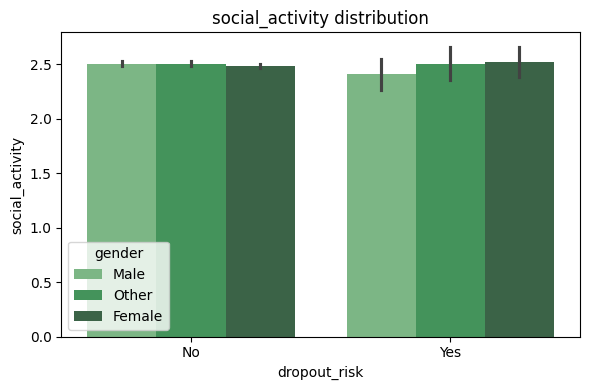

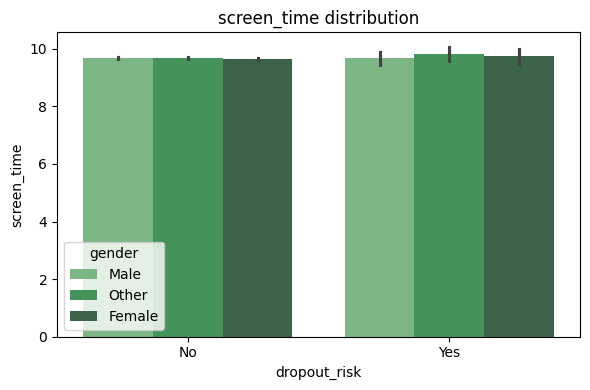

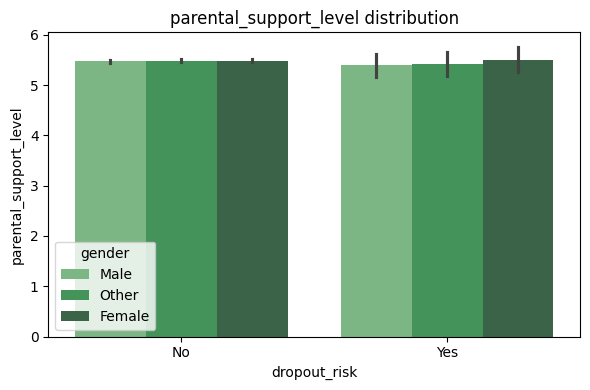

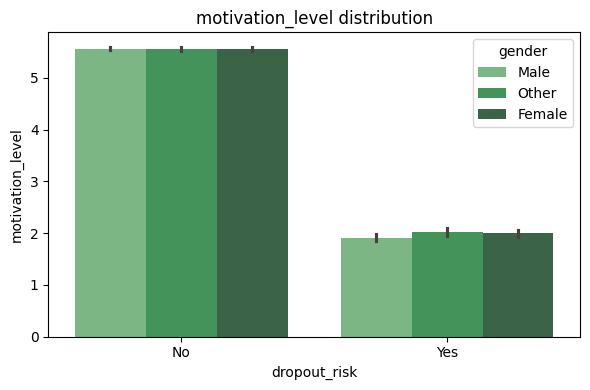

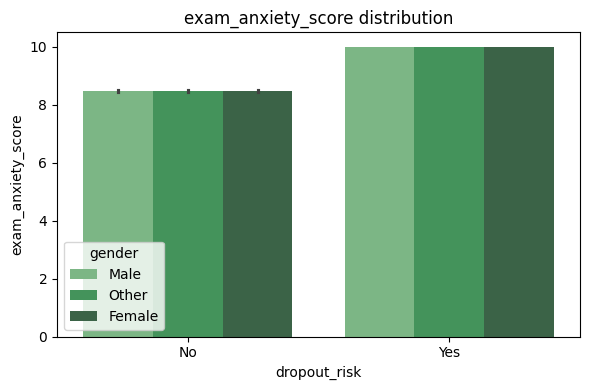

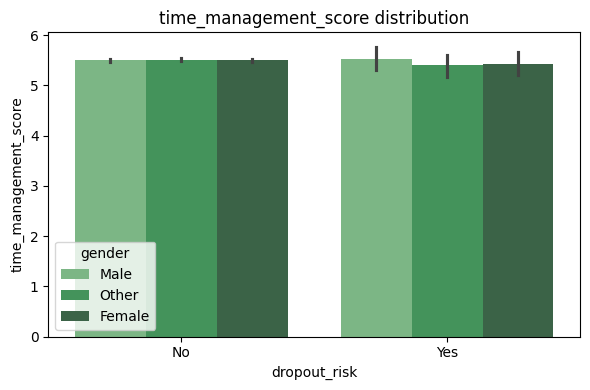

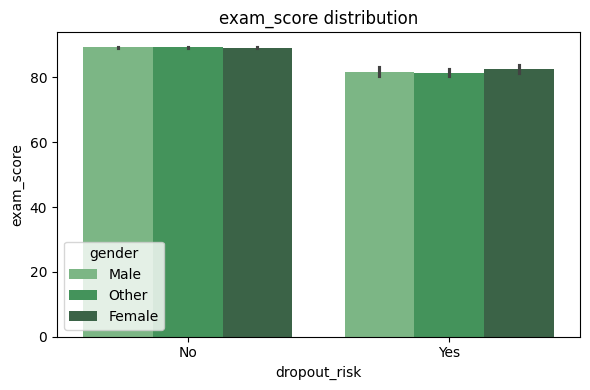

In [5]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
categorical_columns=df.select_dtypes(include=['object']).columns
for cols in numerical_columns:
  plt.figure(figsize=(6,4))
  sns.barplot(x='dropout_risk',y=df[cols],hue="gender",data=df,palette="Greens_d")
  plt.title(f'{cols} distribution')
  plt.xlabel('dropout_risk')
  plt.ylabel(cols)
  plt.tight_layout()
  plt.show()

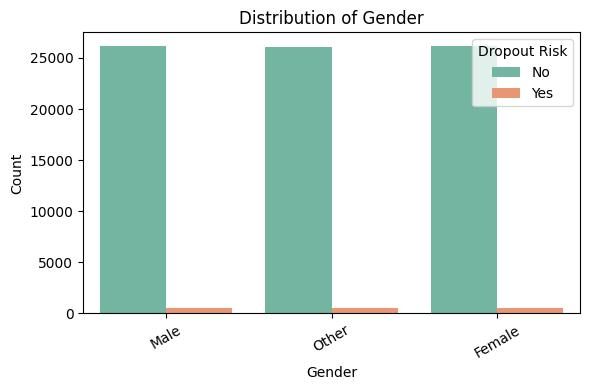

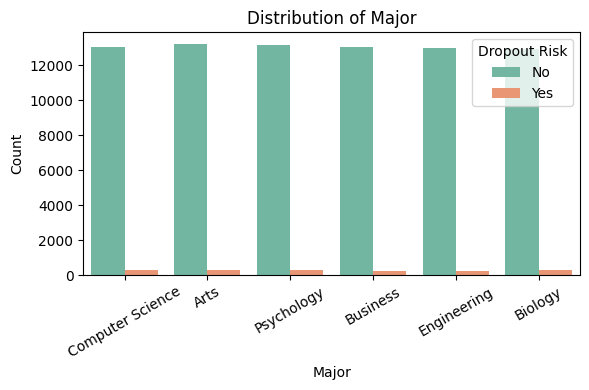

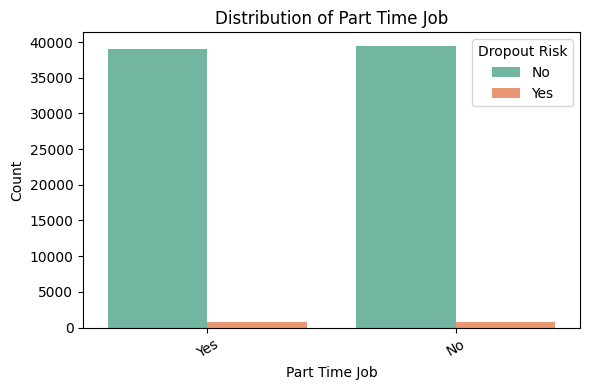

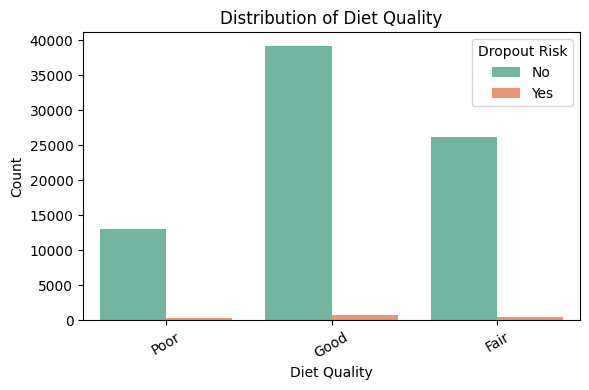

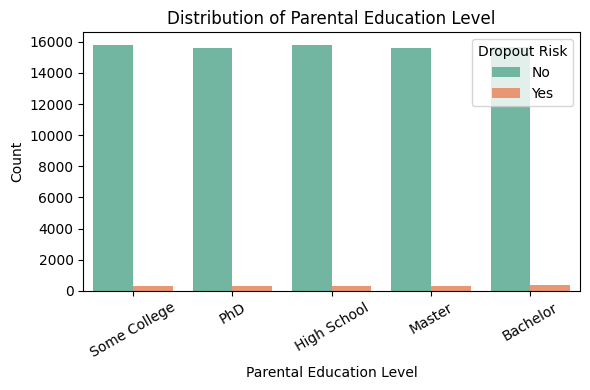

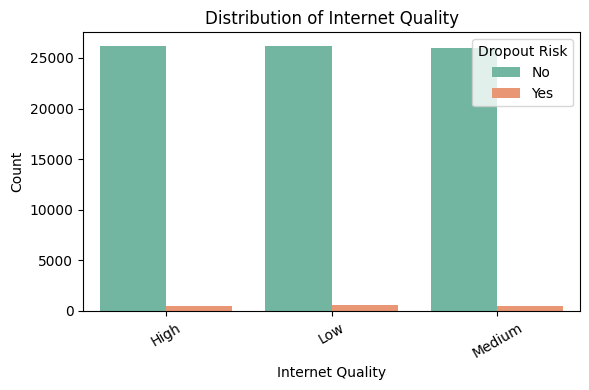

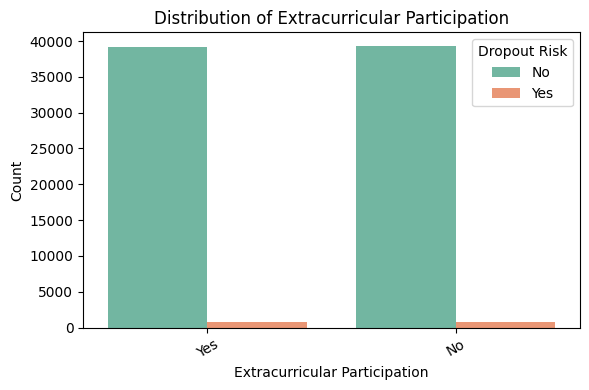

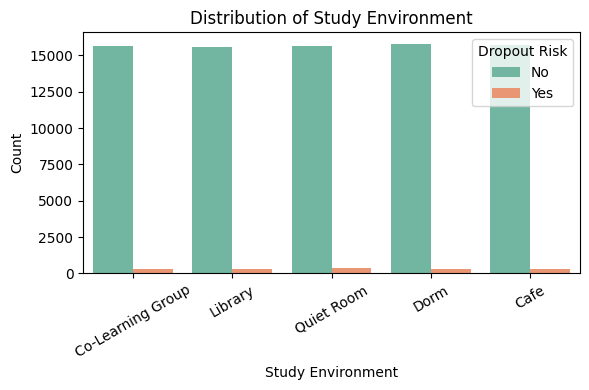

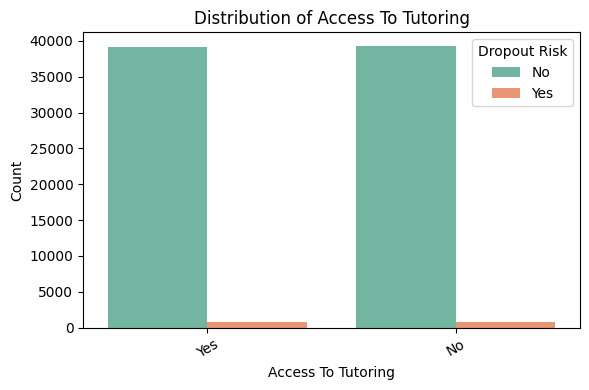

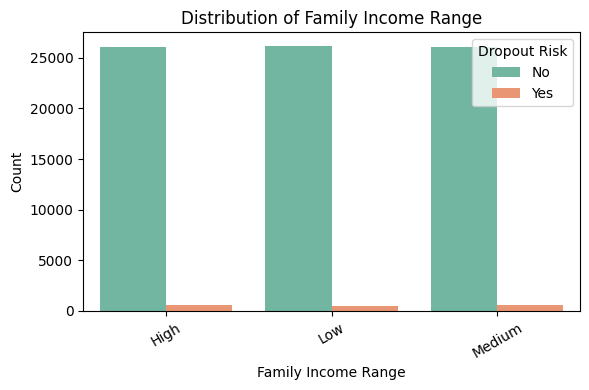

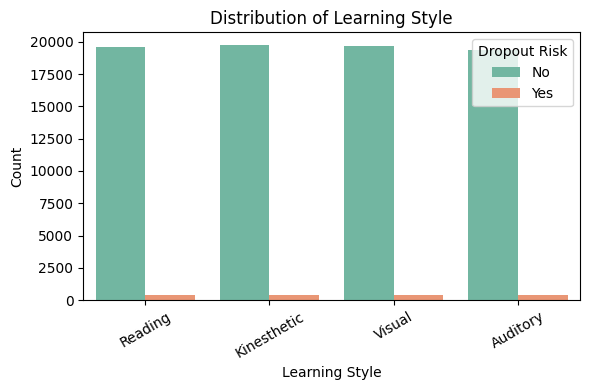

In [6]:
# Distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns.drop("dropout_risk",errors="ignore")

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df,hue="dropout_risk", palette='Set2')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.legend(title='Dropout Risk',labels=["No","Yes"])
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


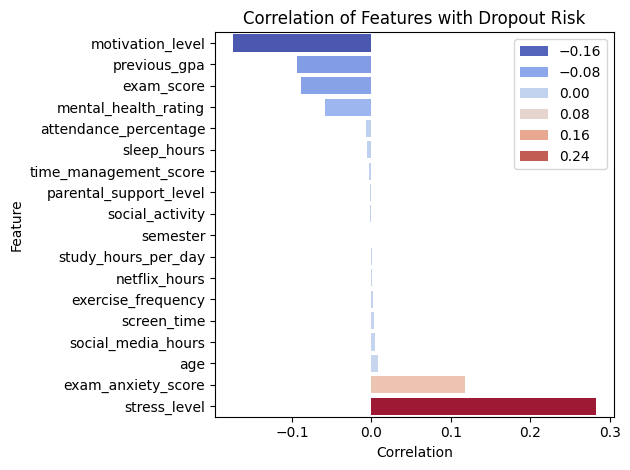

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation and Drop self-correlation
df['dropout_risk_encoded'] = df['dropout_risk'].map({'No': 0, 'Yes': 1})
corr = df.corr(numeric_only=True)['dropout_risk_encoded'].drop('dropout_risk_encoded').sort_values()

# Plot
sns.barplot(x=corr.values, y=corr.index,hue=corr.values,palette='coolwarm',legend=True)
plt.title("Correlation of Features with Dropout Risk")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


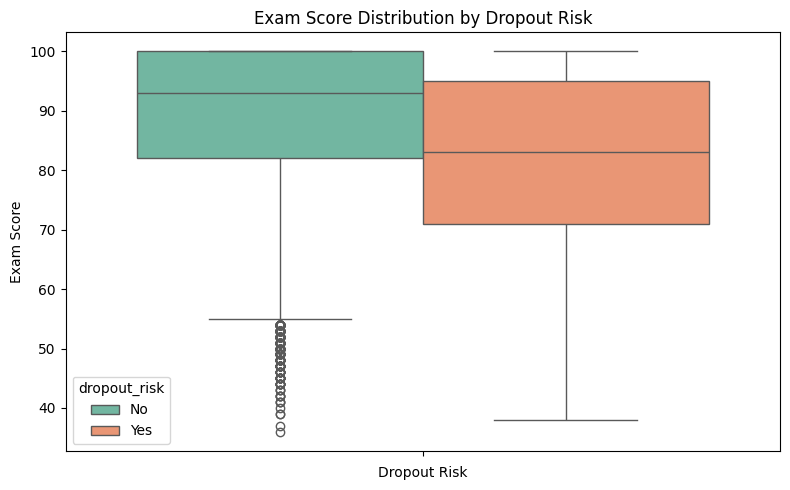

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(hue='dropout_risk', y='exam_score', data=df, palette='Set2')
plt.title('Exam Score Distribution by Dropout Risk')
plt.xlabel('Dropout Risk')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()
